# Project Title: COVID-19 Country-Wise Data Analysis Dashboard

Objective:-
To perform exploratory data analysis (EDA) and visualize the spread, severity, and recovery trends of COVID-19 across countries.

Tools Used
- Python  
- Pandas  
- Matplotlib  
- Seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/country_wise_latest.csv')

In [ ]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,27532,546,7660,19326,658,42,1502,1.98,27.82,7.13,22890,4642,20.28,Eastern Mediterranean
1,Albania,1788,39,1086,663,66,1,9,2.18,60.74,3.59,1385,403,29.10,Europe
2,Algeria,11385,811,8078,2496,117,12,135,7.12,70.95,10.04,10589,796,7.52,Africa
3,Andorra,855,52,792,11,1,0,1,6.08,92.63,6.57,852,3,0.35,Europe
4,Angola,166,8,64,94,11,1,0,4.82,38.55,12.50,118,48,40.68,Africa


In [ ]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.000,1.870000e+02,187.000000,187.000000
mean,4.539163e+04,2427.620321,21873.700535,2.109031e+04,743.454545,26.855615,431.160428,3.324332,60.994759,inf,4.018173e+04,5209.903743,15.979037
std,1.863446e+05,10622.328030,71107.969380,1.150947e+05,2938.993342,120.311717,1593.688171,3.710078,28.416800,NaN,1.687494e+05,20236.624485,23.502999
min,4.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,4.000000e+00,0.000000,0.000000
25%,5.945000e+02,9.000000,189.000000,7.600000e+01,1.000000,0.000000,0.000000,0.855000,38.905000,1.505,4.880000e+02,23.000000,1.495000
50%,2.605000e+03,55.000000,1238.000000,5.930000e+02,20.000000,0.000000,5.000000,2.210000,64.530000,4.210,2.219000e+03,184.000000,9.210000
75%,2.023300e+04,462.000000,9101.500000,6.867500e+03,334.500000,4.000000,108.000000,4.500000,88.035000,8.955,1.685450e+04,2132.500000,24.630000
max,2.191052e+06,118434.000000,599115.000000,1.473503e+06,27762.000000,1238.000000,13534.000000,27.280000,100.000000,inf,2.023590e+06,175314.000000,246.340000


Top countries by confirmed cases

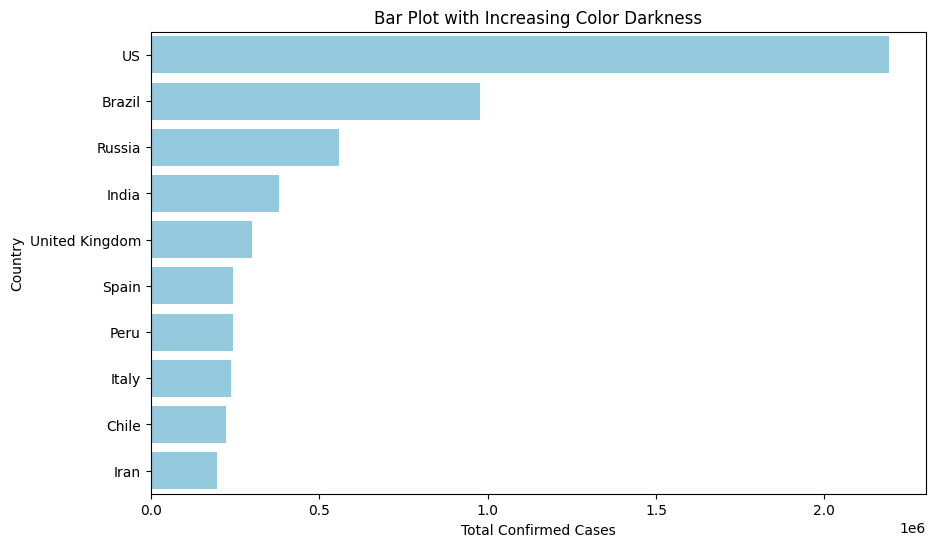

In [ ]:
# Top 10 Countries by Confirmed Cases
top10 = df.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Confirmed', y='Country/Region', data=top10,color='skyblue',)
plt.title('Top 10 Countries with Highest Confirmed Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.title("Bar Plot with Increasing Color Darkness")
plt.show()


Graph for Recovery vs Death rate

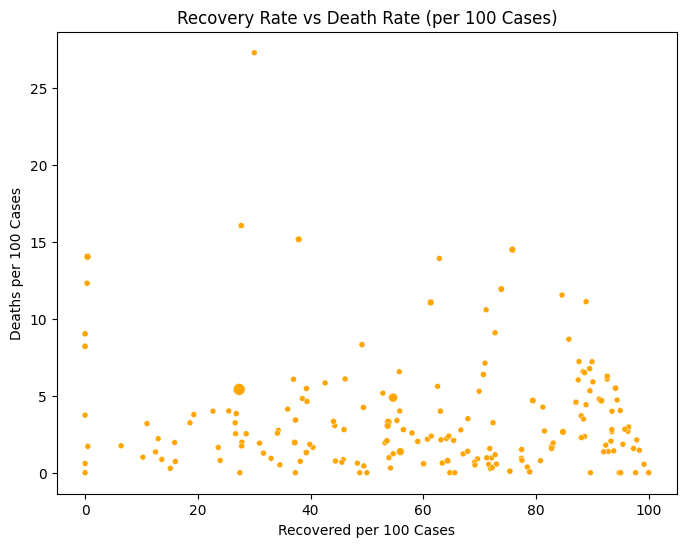

In [ ]:
# Recovery vs Death Rate (Fixed)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Recovered / 100 Cases',
    y='Deaths / 100 Cases',
    size='Confirmed',
    legend=False,color='orange'
)
plt.title('Recovery Rate vs Death Rate (per 100 Cases)')
plt.xlabel('Recovered per 100 Cases')
plt.ylabel('Deaths per 100 Cases')
plt.show()


Active vs confirmed case

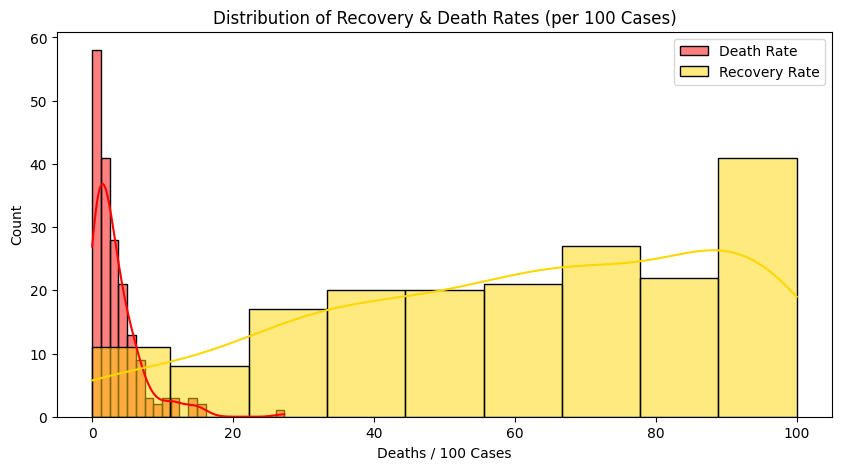

In [ ]:
# Mortality and Recovery Analysis
plt.figure(figsize=(10,5))
sns.histplot(df['Deaths / 100 Cases'], kde=True, color='red', label='Death Rate')
sns.histplot(df['Recovered / 100 Cases'], kde=True, color='gold', label='Recovery Rate')
plt.title('Distribution of Recovery & Death Rates (per 100 Cases)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Example data: country-wise deaths per 100 cases
data = {
    'Country': ['United States', 'India', 'Brazil', 'Russia', 'UK', 'France', 'Germany'],
    'Deaths_per_100_cases': [2.5, 1.2, 2.0, 1.8, 2.3, 2.1, 1.7],
    'Recovered_per_100_cases': [95, 98, 96, 97, 94, 93, 95]  # optional extra info
}

df = pd.DataFrame(data)

# Create a choropleth map with hover data
fig = px.choropleth(
    df,
    locations="Country",
    locationmode='country names',
    color="Deaths_per_100_cases",
    hover_name="Country",
    hover_data={
        'Deaths_per_100_cases': True,
        'Recovered_per_100_cases': True
    },
    color_continuous_scale=px.colors.sequential.OrRd,
    title="World Map of Death Ratio per 100 Cases"
)

fig.show()


In [ ]:
# Insight Summary
print("✅ Key Insights:")
print("-", df['Country/Region'][df['Confirmed'].idxmax()], "has the highest confirmed cases.")
print("- Average recovery rate:", round(df['Recovered / 100 Cases'].mean(), 2))
print("- Average death rate:", round(df['Deaths / 100 Cases'].mean(), 2))
print("- There are", df.shape[0], "countries in this dataset.")


✅ Key Insights:
- US has the highest confirmed cases.
- Average recovery rate: 60.99
- Average death rate: 3.32
- There are 187 countries in this dataset.
